In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib as mpl
import os
import pylab as plt
import geopandas as gpd
import seaborn as sns
import adjustText as aT
sns.set(style="darkgrid")
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from glob import glob
from os.path import isfile, join
import sys
import pylab as pl

path_r8 = '/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/08_Fieldwork/08_Data/R8_data/'
path_excel = '/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/08_Fieldwork/08_Data/R8_data/excel/'
path_plots = '/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/08_Fieldwork/08_Data/R8_data/plots/margins/'
path_paper_final='/Users/sophieayling/Library/CloudStorage/GoogleDrive-sophie2ayling@gmail.com/My Drive/PhD/08_Fieldwork/08_Data/R8_data/plots/final_paper/'


In [2]:
ld_nld = pd.read_csv(path_paper_final+'margins_tables_for_python_200.csv', sep=',')

ld_nld.head()



,subgroup,Margin,std. error,t,P>t,CI_lb_95,CI_ub_95
0,Overall,-10.376,0.374000,-27.73,0.0,-11.110000,-9.643000
1,GENDER,NaN,NaN,NaN,NaN,NaN,NaN
2,Male,-14.390,0.602190,-23.89,0.0,-15.569650,-13.208750
3,Female,-7.570,0.499074,-15.16,0.0,-8.545954,-6.589317
4,SOCIO-ECONOMIC STATUS,NaN,NaN,NaN,NaN,NaN,NaN


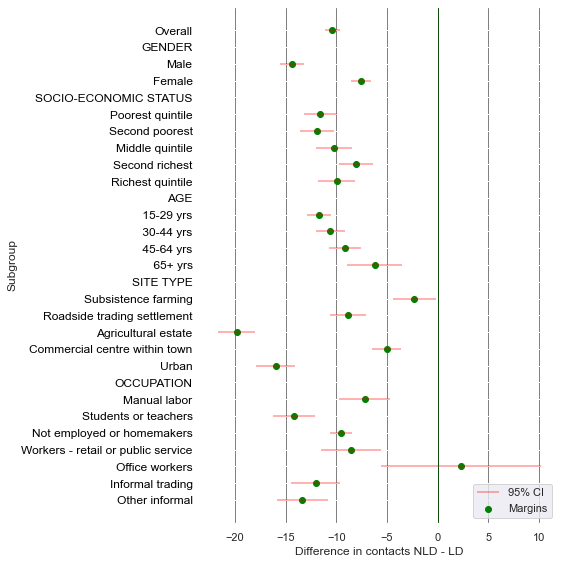

In [3]:
# Reorder it following the values of the first value:
ordered_df = ld_nld
#ordered_df = dist_true_plus_sim[['districtId', 'true_cases_by_dist', 'sim_tot_cases_dist_med']]

my_range=range(1,len(ld_nld.index)+1)
fig, ax = plt.subplots (figsize = (8, 8))

# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=list(ordered_df['CI_lb_95']), xmax=list(ordered_df['CI_ub_95']), color='red', alpha=0.4, label = "95% CI")
plt.scatter(ordered_df['Margin'], my_range, color='green', alpha=1, label='Margins')
#plt.scatter(ordered_df['ld_all_ages_contacts_week'], my_range, color='red', alpha=0.4 , label='total contacts lockdown')
plt.legend(loc='lower right')
 
# Add title and axis names
plt.yticks(my_range, ordered_df['subgroup'], fontsize=12, weight=12, color='black')
#plt.title("Marginal differences in contact rates between lockdown \n vs. non lockdown. Source: Manicaland Centre R8 2021", loc='left')
plt.xlabel('Difference in contacts NLD - LD')
plt.ylabel('Subgroup') 
ax.set_facecolor('white')
plt.grid(color='grey', axis="x")
plt.axvline(0, color="green", linewidth=1) # adding black line

#add black line at zero
plt.axvline(0, color="k", linewidth=0.5) 

#invert axis 
plt.gca().invert_yaxis()
# use adjust text function 
plt.tight_layout()
#limit range on axis
#plt.xlim([0, 60])

# Show the graph
plt.savefig(path_paper_final+'contact_diffs_margins_lolipop_sg_order_.png', dpi=300)


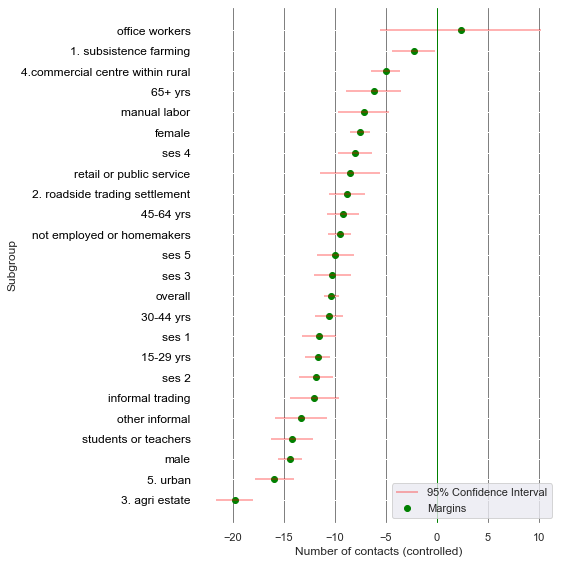

In [7]:
# Reorder it following the values of the first value:
ordered_df = ld_nld.sort_values(by='Margin')
#ordered_df = dist_true_plus_sim[['districtId', 'true_cases_by_dist', 'sim_tot_cases_dist_med']]

my_range=range(1,len(ld_nld.index)+1)
fig, ax = plt.subplots (figsize = (8, 8))

# The horizontal plot is made using the hline function
plt.hlines(y=my_range, xmin=list(ordered_df['CI_lb_95']), xmax=list(ordered_df['CI_ub_95']), color='red', alpha=0.4, label = "95% Confidence Interval")
plt.scatter(ordered_df['Margin'], my_range, color='green', alpha=1, label='Margins')
#plt.scatter(ordered_df['ld_all_ages_contacts_week'], my_range, color='red', alpha=0.4 , label='total contacts lockdown')
plt.legend(loc='lower right')
 
# Add title and axis names
plt.yticks(my_range, ordered_df['subgroup'], fontsize=12, weight=12, color='black')
#plt.title("Margins on changes in contact rates in lockdown vs. non lockdown. Source: Manicaland Centre R8 2021", loc='left')
plt.xlabel('Number of contacts (controlled)')
plt.ylabel('Subgroup')
ax.set_facecolor('white')
plt.grid(color='grey', axis="x")
plt.axvline(0, color="green", linewidth=1) # adding black line

# use adjust text function 
plt.tight_layout()
#limit range on axis
#plt.xlim([0, 60])

# Show the graph
plt.savefig(path_paper_final+'contact_diffs_margins_lolipop_order_200.png', dpi=300)
